# My old fit ( no opt )

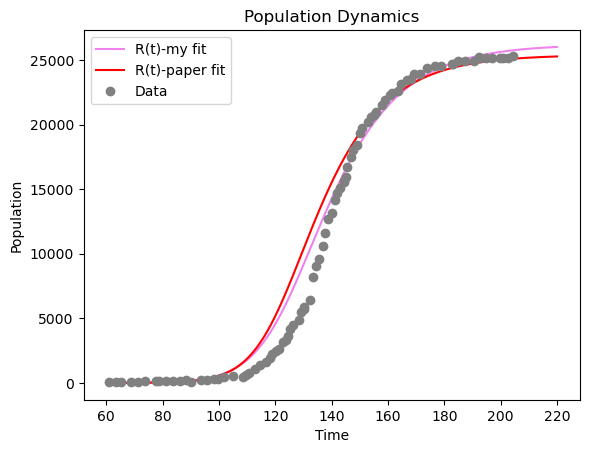

In [3]:
# Define the system of differential equations
def model(y, t, n, taui, taur):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt

# Set initial conditions for my fit
t0 = 45.4
n0 = 1.1+0.7 #XX
T0 = 1
S0 = 27305+1500 ##XX UP AND DOWN 
I0 = 1
R0 = 0
y0  = [n0, T0, S0, I0, R0] #my fit
# Set other parameters
h = 0.01
taui = 4.9+0.4 #my fit
taur = 14 #my fit

# Set initial conditions for their fit
t00 = 45.4
n00 = 1.1 #XX
T00 = 1
S00 = 27305 ##XX UP AND DOWN 
I00 = 1
R00 = 0
y00 = [n00, T00, S00, T00, R00] #their fit
# Set other parameters
h = 0.01
taui00 = 4.9 #their fit
taur00 = 14 #their fit

t = np.arange(60, 220, h)

# Solve the system of differential equations using odeint
solution = odeint(model, y0, t, args=(n0, taui, taur))
solution00 = odeint(model, y00, t, args=(n0, taui00, taur00))

# Extract results
n, T, S, I, R = solution[:, 0], solution[:, 1], solution[:, 2], solution[:, 3], solution[:, 4]
n00, T00, S00, I00, R00 = solution00[:, 0], solution00[:, 1], solution00[:, 2], solution00[:, 3], solution00[:, 4]

#DATA
file_path = 'Dataset 1.csv' 
df = pd.read_csv(file_path)
x_values = df['x']
y_values = df['y']

# Plot the results if needed
# plt.plot(t, n, label='n(t)')
# plt.plot(t, T, label='T(t)')
# plt.plot(t, S, label='S(t)')
# plt.plot(t, I, label='I(t)')
plt.plot(t, R, label='R(t)-my fit',color='violet')
plt.plot(t, R00, label='R(t)-paper fit', color='red')
plt.plot(x_values, y_values, 'o', label='Data',color='grey')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics')
plt.show()

# Initial fits

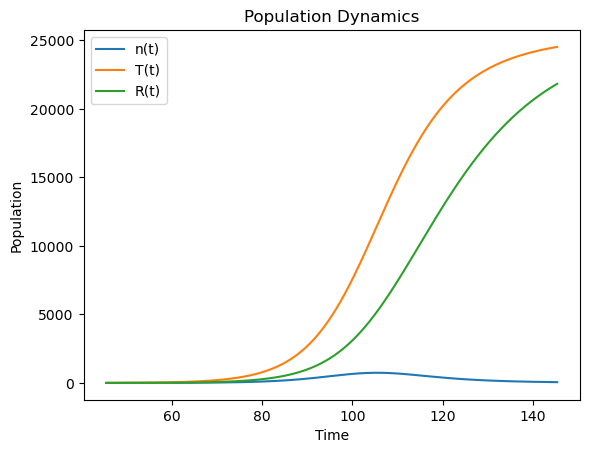

In [2]:
import numpy as np
from scipy.integrate import odeint

# Define the system of differential equations
def model(y, t):
    n, T, S, I, R = y
    dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
    dTdt = n
    dSdt = -n
    dIdt = n - I/taur
    dRdt = I/taur
    dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
    return dydt

# Set initial conditions
t0 = 45.4
n0 = 1.1
T0 = 1
S0 = 27305
I0 = 1
R0 = 0
y0 = [n0, T0, S0, I0, R0]

# Set other parameters
h = 0.01
taui = 4.9
taur = 14

# Create a time array
t = np.arange(t0, t0 + 100, h)

# Solve the system of differential equations using odeint
solution = odeint(model, y0, t)

# Extract results
n, T, S, I, R = solution[:, 0], solution[:, 1], solution[:, 2], solution[:, 3], solution[:, 4]

# Plot the results if needed
import matplotlib.pyplot as plt
plt.plot(t, R, label='R(t)')

# plt.plot(t, n, label='n(t)')
# plt.plot(t, T, label='T(t)')
# plt.plot(t, S, label='S(t)')
# plt.plot(t, I, label='I(t)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics')
plt.show()


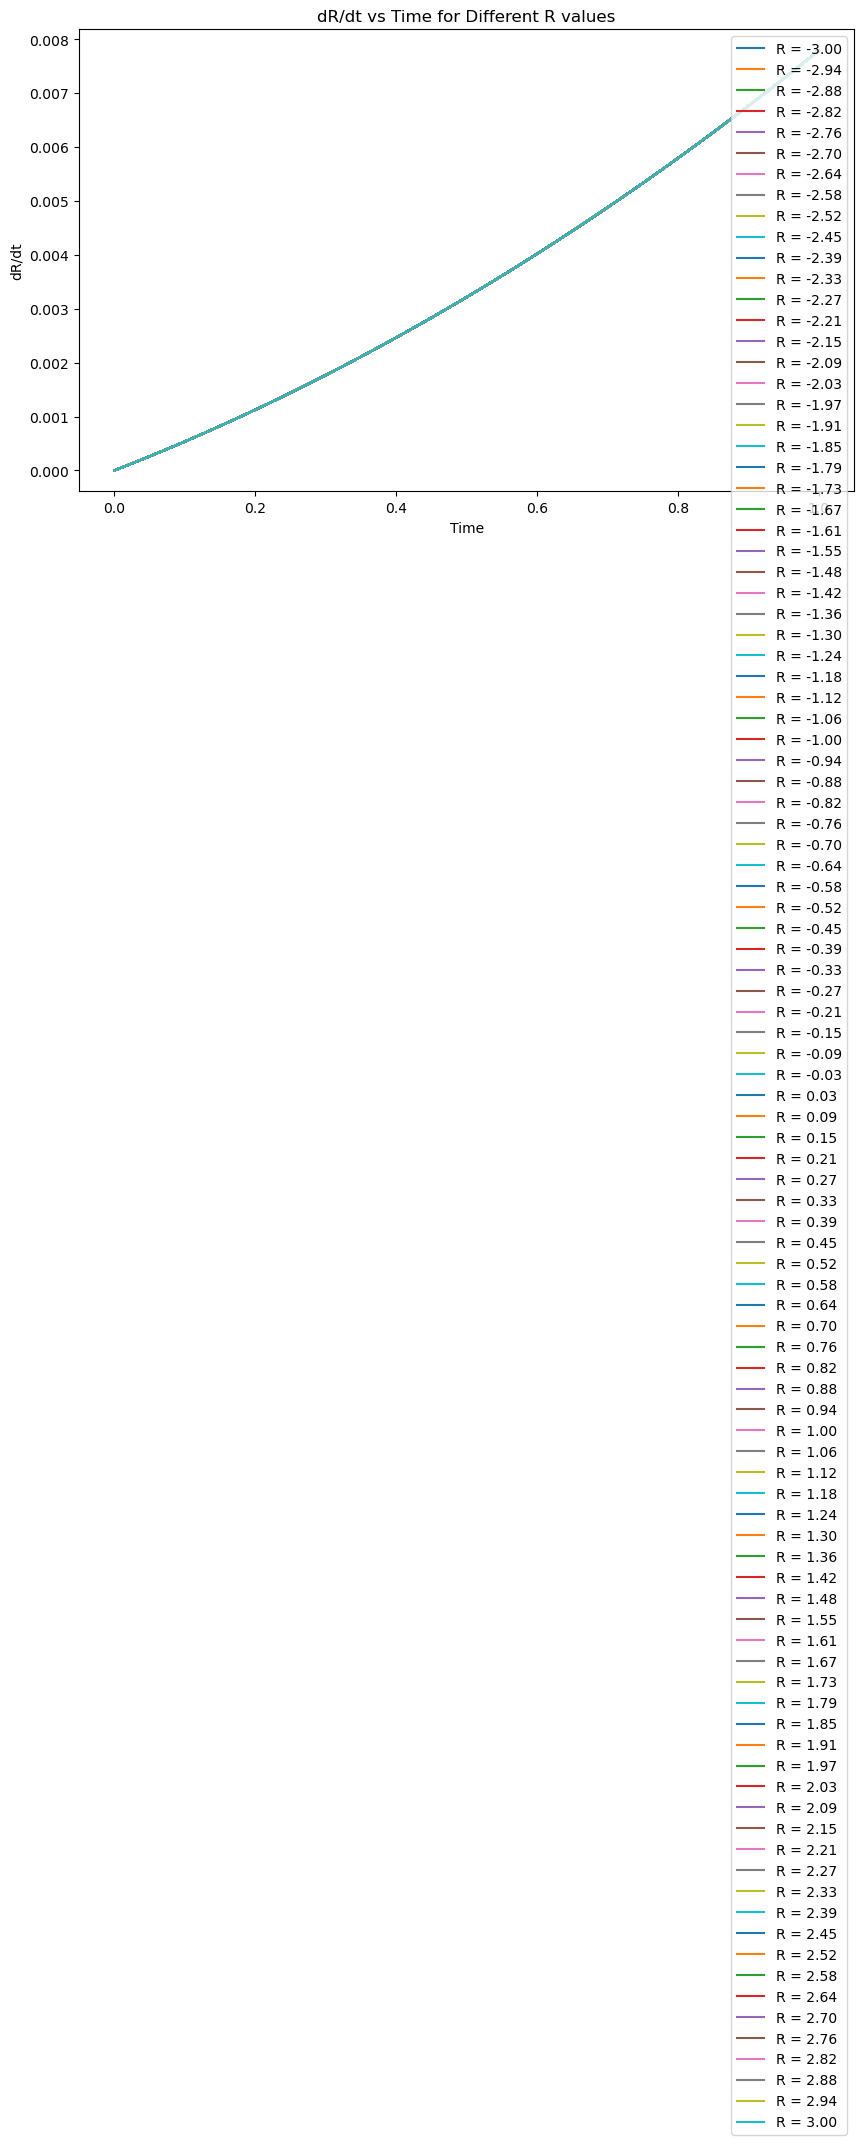

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Assuming y0 is defined somewhere before this code snippet
y0 = [n0, T0, S0, I0, R0]

# Function to integrate the model over time
def integrate_model(R_value):
    def model(y, t, R):
        n, T, S, I, R = y
        dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
        dTdt = n
        dSdt = -n
        dIdt = n - I/taur
        dRdt = I/taur
        dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
        return dydt

    t = np.linspace(0, 1, 100)  # Adjust the time range as needed
    y = odeint(model, y0, t, args=(R_value,))
    dRdt_values = y[:, 4] / taur  # Extract dRdt values at each time point
    return t, dRdt_values

# Values
taui = 4.9
taur = 14

# Range of R values
R_values = np.linspace(-3, 3, 100)

# Plot dRdt vs t for each R
plt.figure(figsize=(10, 6))
for R_value in R_values:
    t, dRdt_values = integrate_model(R_value)
    plt.plot(t, dRdt_values, label=f'R = {R_value:.2f}')

plt.xlabel('Time')
plt.ylabel('dR/dt')
plt.title('dR/dt vs Time for Different R values')
plt.legend()
plt.show()


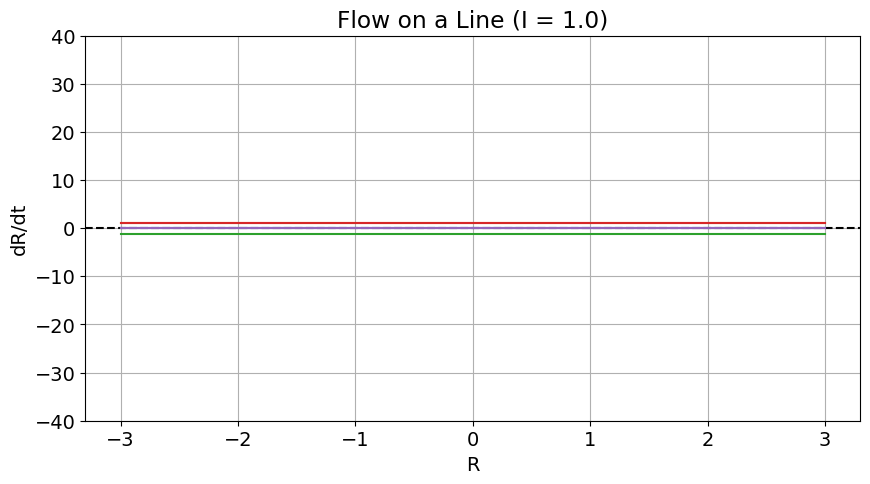

In [24]:
def model(y, t):
        n, T, S, I, R = y
        dndt = n * ((1/taui) * ((S - I) / (S + I + R)) - 1/taur)
        dTdt = n
        dSdt = -n
        dIdt = n - I/taur
        dRdt = I/taur
        dydt = [dndt, dTdt, dSdt, dIdt, dRdt]
        return dydt
R_values = np.linspace(-3, 3, 100)
dRdt_values = []
t0 = 45.4
n0 = 1.1
T0 = 1
S0 = 27305
I0 = 1
R0 = 0
y0 = [n0, T0, S0, I0, R0]

for m in R_values:
    dRdt_values.append(model(y0, m))
# Plot derivative vs x
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 5))
plt.axhline(0, color='k', linestyle='--')
plt.grid()
plt.xlabel("R")
plt.ylabel("dR/dt")
plt.title("Flow on a Line (I = 1.0)")
plt.plot(R_values, dRdt_values);
plt.ylim(-40, 40); 